**Question 2, Part (a):**
1. **Load Data**: We read the ingredient data from `Question1_B.csv` into a DataFrame.

2. **Count Unique Ingredients**: We find out how many unique ingredients there are by counting distinct values in the 'Ingredient' column and print this number.

3. **List Ingredients and Frequencies**: We count how often each ingredient appears and print this list.

4. **Create and Save DataFrame**: We put this list into a new DataFrame, rename the columns to 'Ingredient' and 'Frequency', and save it to `Question2_A.csv`.

5. **Confirmation**: We print a message to confirm that the data has been saved successfully.

In [1]:
import pandas as pd

# Load the extracted ingredients CSV file
df = pd.read_csv('Question1_B.csv')

# Task 1: Find the number of unique ingredients
unique_ingredients_count = df['Ingredient'].nunique()
print(f"Number of unique ingredients: {unique_ingredients_count}")

# Task 2: List all unique ingredients along with their frequencies
ingredient_frequencies = df['Ingredient'].value_counts()
print("\nIngredient | Frequency")
print(ingredient_frequencies)

# Task 3: Store the list in a DataFrame
ingredient_frequencies_df = ingredient_frequencies.reset_index()
ingredient_frequencies_df.columns = ['Ingredient', 'Frequency']

# Save the DataFrame to a new CSV file
ingredient_frequencies_df.to_csv('Question2_A.csv', index=False)

print("\nIngredient frequencies have been saved to 'Question2_A.csv'.")


Number of unique ingredients: 1323

Ingredient | Frequency
Ingredient
pepper      5985
oil         4517
salt        4174
onion       4164
cheese      2776
            ... 
rest           1
squid          1
lb             1
hill           1
hellmann       1
Name: count, Length: 1323, dtype: int64

Ingredient frequencies have been saved to 'Question2_A.csv'.


**Question 2, Part (b)**:

1. **Calculate Recipe Sizes**: We count the number of ingredients in each recipe using `groupby` and `size`.

2. **Distribution of Sizes**: We find how many recipes have each size and calculate the percentage of total recipes for each size.

3. **Plot the Distribution**: We plot these percentages with dots connected by lines. The x-axis represents the recipe size (number of ingredients), and the y-axis shows the percentage of recipes with that size. The plot is saved as `Question2_B_Recipe_Size_Distribution.png`.

4. **Average Recipe Size**: We compute the average number of ingredients per recipe, round it to the nearest integer, and print this value.

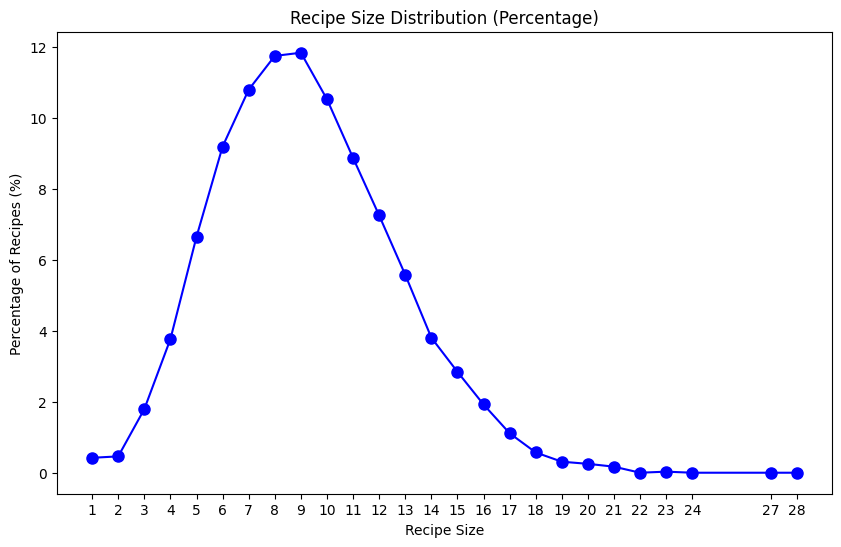

Average size of the recipes (rounded to the nearest integer): 9


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the extracted ingredients CSV file
df = pd.read_csv('Question1_B.csv')

# Task 1: Calculate recipe sizes (number of ingredients per recipe)
# Count the number of ingredients per recipe
recipe_sizes = df.groupby('Recipe ID').size()

# Calculate the counts for each recipe size
counts = recipe_sizes.value_counts().sort_index()

# Calculate percentages
total_recipes = counts.sum()
percentages = (counts / total_recipes) * 100

# Task 2: Plot the recipe size distribution with dots connected by lines, showing percentages
plt.figure(figsize=(10, 6))
plt.plot(percentages.index, percentages.values, marker='o', linestyle='-', color='b', markersize=8)
plt.title('Recipe Size Distribution (Percentage)')
plt.xlabel('Recipe Size')
plt.ylabel('Percentage of Recipes (%)')
plt.xticks(percentages.index)  # Set x-ticks to match ingredient count

# Save the plot as a PNG file
plt.savefig('Question2_B_Recipe_Size_Distribution.png')
plt.show()

# Task 3: Find the average size of the recipes and round to the nearest integer
average_size = round(recipe_sizes.mean())
print(f"Average size of the recipes (rounded to the nearest integer): {average_size}")


**Question 2, Part (c)**:

1. **Calculate Recipe Sizes**: We count the number of ingredients in each recipe.

2. **Compute Cumulative Distribution Function (CDF)**:
   - **Sort Sizes**: Sort the recipe sizes in descending order.
   - **Calculate CDF**: Compute the cumulative percentage for each sorted recipe size.

3. **Plot the CDF**:
   - **Plot**: Create a plot with recipe sizes on the x-axis and the cumulative percentage on the y-axis.
   - **Labeling**: Add titles and axis labels for clarity.
   - **Save Plot**: Save the plot as `Question2_C_Cumulative_Distribution_Function.png`.


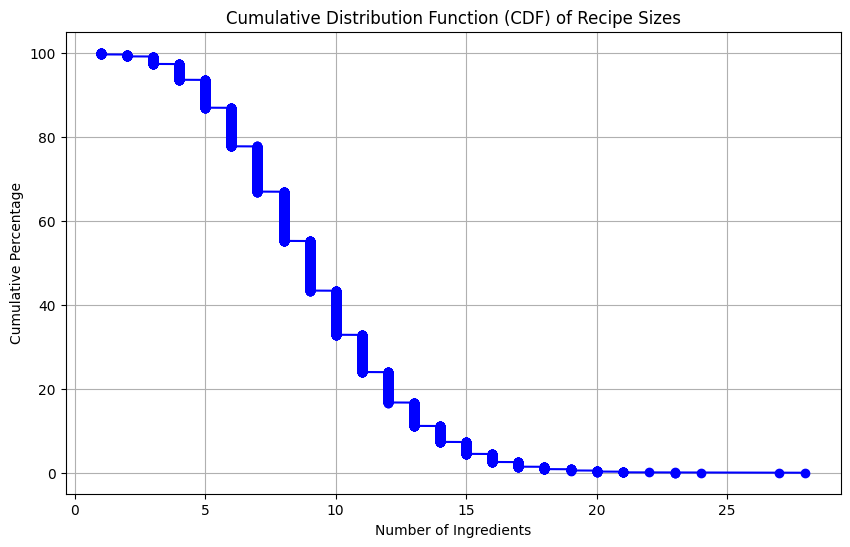

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the extracted ingredients CSV file
df = pd.read_csv('Question1_B.csv')

# Calculate the size of each recipe (number of ingredients per recipe)
recipe_sizes = df.groupby('Recipe ID').size()

# Calculate the cumulative distribution function (CDF)
sorted_sizes = sorted(recipe_sizes, reverse=True)  # Sort in reverse
cdf = [i / len(sorted_sizes) * 100 for i in range(len(sorted_sizes))]  # Convert to percentage

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_sizes, cdf, marker='o', linestyle='-', color='b')
plt.title('Cumulative Distribution Function (CDF) of Recipe Sizes')
plt.xlabel('Number of Ingredients')
plt.ylabel('Cumulative Percentage')
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('Question2_C_Cumulative_Distribution_Function.png')
plt.show()
